# Project Description

In the modern digital era, platforms like Twitter serve as vital channels for disseminating information, especially during emergencies and disasters. 
However, distinguishing genuine disaster-related tweets from unrelated or metaphorical mentions poses significant challenges due to the nuanced nature of language

This project focuses on using machine learning to classify tweets as disaster-related or not.By applying advanced natural language processing (NLP) techniques, this project aims to create a reliable system that helps organizations detect and respond to disasters quickly and effectively.

# Objective

The primary goal is to create a scalable and accurate classification model that identifies disaster-related tweets. The solution aims to handle linguistic variations such as slang, cultural nuances, and abbreviations, ensuring robust performance across diverse datasets.This will enable real-time monitoring of large tweet volumes, ensuring timely and precise disaster detection to support better emergency management.

# Part 1: Data Exploration and Preparation

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing libraries

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from collections import defaultdict

from sklearn.model_selection import train_test_split

In [3]:
# Loading the dataset
twitter = pd.read_csv("C:/Users/vipin/OneDrive/Documents/Desktop/Project7/twitter_disaster.csv")

Concise summarization of total information provided by the data

In [4]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


Displaying first 10 rows of our data

In [5]:
twitter.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


counting no. of rows

In [6]:
twitter.count()

id          7613
keyword     7552
location    5080
text        7613
target      7613
dtype: int64

In [7]:
twitter.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

checking missing values

In [8]:
missing_values = twitter[['keyword', 'location']].isnull().mean() * 100
missing_values

keyword      0.801261
location    33.272035
dtype: float64

Missing Data:

keyword: 0.8% missing values (negligible).
location: 33.27% missing values, which is substantial and may require either imputation or exclusion depending on its significance.

We only use text and target column of dataset for rest of our work as there lot's of null values inside other columns

C:\Users\vipin\AppData\Local\Temp\ipykernel_23716\801139952.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=twitter, x='target', palette="magma")


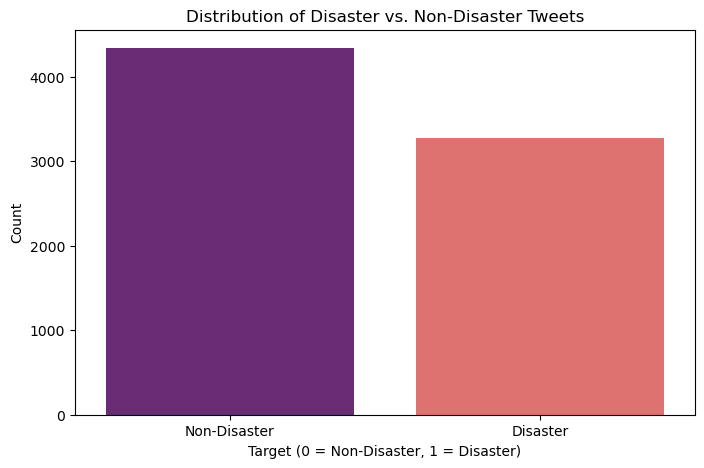

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(data=twitter, x='target', palette="magma")
plt.title('Distribution of Disaster vs. Non-Disaster Tweets')
plt.xlabel('Target (0 = Non-Disaster, 1 = Disaster)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Disaster', 'Disaster'])

# Save the plot
plt.savefig('Distribution_of_Disaster_vs_Non_Disaster_Tweets.png')

# Display the plot
plt.show()

The distribution of target values shows a roughly balanced dataset

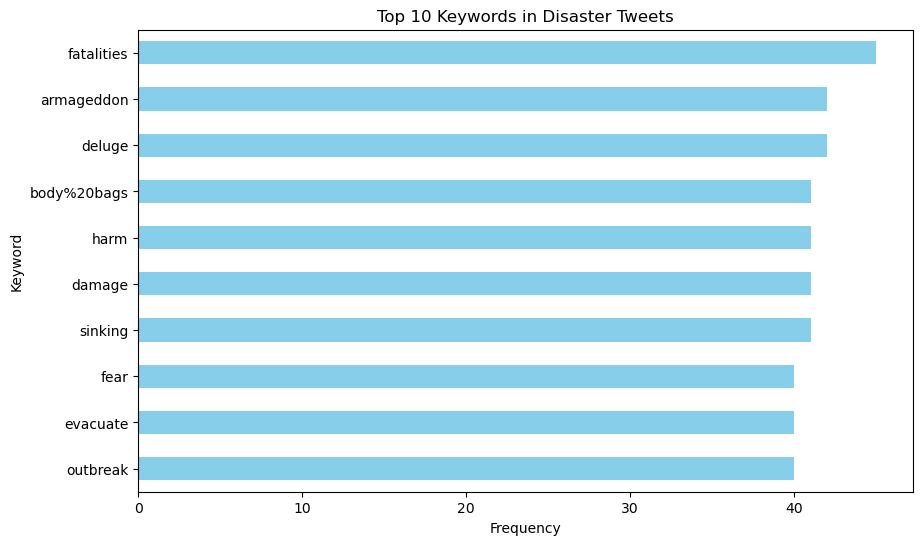

In [10]:

# Count the most frequent keywords
keyword_counts = twitter['keyword'].value_counts().head(10)

# Plot the top keywords
plt.figure(figsize=(10, 6))
keyword_counts.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title("Top 10 Keywords in Disaster Tweets")
plt.xlabel("Frequency")
plt.ylabel("Keyword")
plt.show()


# Calculate the word lengths for disaster and non-disaster tweets

In [11]:



disaster_words_len = twitter[twitter['target'] == 1]['text'].str.split().apply(len)
non_disaster_words_len = twitter[twitter['target'] == 0]['text'].str.split().apply(len)

disaster_words_len , non_disaster_words_len


(0       13
 1        7
 2       22
 3        8
 4       16
         ..
 7608    11
 7609    20
 7610     8
 7611    19
 7612    13
 Name: text, Length: 3271, dtype: int64,
 15       3
 16       3
 17       3
 18       5
 19       3
         ..
 7581    13
 7582    11
 7584    13
 7587     2
 7593    12
 Name: text, Length: 4342, dtype: int64)

In [12]:
# Create subplots
figure = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Disaster Tweets Word Length", "Non-Disaster Tweets Word Length")
)


In [13]:


# Adding histograms for both disaster and non-disaster tweets
figure.add_trace(
    go.Histogram(x=disaster_words_len, marker=dict(color='green', line=dict(color='black', width=1.5))),
    row=1, col=1
)
figure.add_trace(
    go.Histogram(x=non_disaster_words_len, marker=dict(color='turquoise', line=dict(color='black', width=1.5))),
    row=1, col=2
)

# Update layout
figure.update_layout(
    title="Distribution of Word Lengths in Tweets",
    title_x=0.5,
    showlegend=False
)

# Displaying the graph
figure.show()


In [14]:
# Calculate the min and max word lengths for both categories
disaster_word_range = (disaster_words_len.min(), disaster_words_len.max())
non_disaster_word_range = (non_disaster_words_len.min(), non_disaster_words_len.max())

disaster_word_range, non_disaster_word_range


((2, 30), (1, 31))

From the plot we can say that the number of words in the tweets ranges from 2 to 30 in both cases

## Visualising average word lengths of tweets

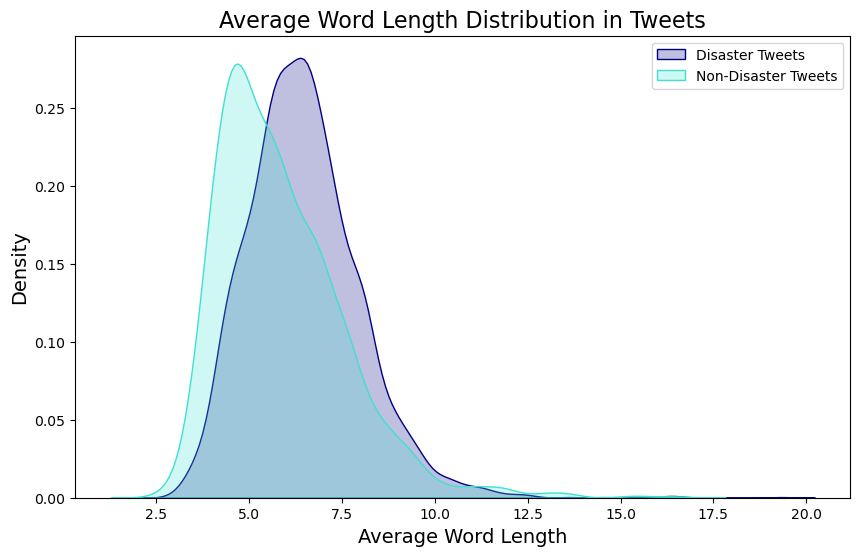

In [15]:
import seaborn as sns

def awl(text_list):
    return [len(word) for word in text_list]

disaster_texts = twitter[twitter['target'] == 1]['text'].str.split()
non_disaster_texts = twitter[twitter['target'] == 0]['text'].str.split()

avg_word_len_disaster = disaster_texts.apply(awl).map(np.mean)
avg_word_len_non_disaster = non_disaster_texts.apply(awl).map(np.mean)

plt.figure(figsize=(10, 6))

# KDE plot
sns.kdeplot(avg_word_len_disaster, label="Disaster Tweets", color='navy', fill=True)
sns.kdeplot(avg_word_len_non_disaster, label="Non-Disaster Tweets", color='turquoise', fill=True)

plt.title("Average Word Length Distribution in Tweets", fontsize=16)
plt.xlabel("Average Word Length", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend()

# Displaying result
plt.show()




In [16]:
#Plotly trace
disaster_hist_trace = go.Histogram(
    x=avg_word_len_disaster,
    name='Disaster Tweets',
    marker=dict(color='navy', line=dict(color='black', width=1.5)),
    opacity=0.75,
    xbins=dict(size=0.2)
)

non_disaster_hist_trace = go.Histogram(
    x=avg_word_len_non_disaster,
    name='Non-Disaster Tweets',
    marker=dict(color='turquoise', line=dict(color='black', width=1.5)),
    opacity=0.75,
    xbins=dict(size=0.2)
)

fig = go.Figure(data=[disaster_hist_trace, non_disaster_hist_trace])

# Update layout
fig.update_layout(
    title="Average Word Length Distribution in Tweets (Plotly)",
    xaxis_title="Average Word Length",
    yaxis_title="Frequency",
    barmode='overlay'
)

# Showing figure
fig.show()

In [17]:
# Calculating the range average word lengths for both tweets
range_disaster = (avg_word_len_disaster.min(), avg_word_len_disaster.max())
range_non_disaster = (avg_word_len_non_disaster.min(), avg_word_len_non_disaster.max())

print(f"The average word lengths for real disaster tweets are found to be in the range of {range_disaster[0]:.2f} to {range_disaster[1]:.2f} words,")
print(f"while for fake disaster tweets they are in the range of {range_non_disaster[0]:.2f} to {range_non_disaster[1]:.2f} words.")


The average word lengths for real disaster tweets are found to be in the range of 3.00 to 19.33 words,
while for fake disaster tweets they are in the range of 2.25 to 16.86 words.


# Visualising most common stop words

In [18]:
from collections import Counter
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud

nltk.download('stopwords')

def preprocess_text(text):
    text = text.lower()  # Convertng into lowercase
    text = re.sub(r'\W', ' ', text)  # Removing non-alphabetic characters
    text = re.sub(r'\s+', ' ', text).strip()  # Removing extra spaces
    return text.split()  # Tokenize by splitting on spaces




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vipin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# Filter disaster by 0 and 1
disaster_tweets = twitter[twitter['target'] == 1]['text'].apply(preprocess_text)
non_disaster_tweets = twitter[twitter['target'] == 0]['text'].apply(preprocess_text)

disaster_tweets , non_disaster_tweets

(0       [our, deeds, are, the, reason, of, this, earth...
 1           [forest, fire, near, la, ronge, sask, canada]
 2       [all, residents, asked, to, shelter, in, place...
 3       [13, 000, people, receive, wildfires, evacuati...
 4       [just, got, sent, this, photo, from, ruby, ala...
                               ...                        
 7608    [two, giant, cranes, holding, a, bridge, colla...
 7609    [aria_ahrary, thetawniest, the, out, of, contr...
 7610    [m1, 94, 01, 04, utc, 5km, s, of, volcano, haw...
 7611    [police, investigating, after, an, e, bike, co...
 7612    [the, latest, more, homes, razed, by, northern...
 Name: text, Length: 3271, dtype: object,
 15                                     [what, s, up, man]
 16                                      [i, love, fruits]
 17                                   [summer, is, lovely]
 18                                [my, car, is, so, fast]
 19                             [what, a, goooooooaaaaaal]
              

In [20]:
# Remove stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

In [21]:
# Apply stopword removal
disaster_tokens = disaster_tweets.apply(remove_stopwords).head(10)
non_disaster_tokens = non_disaster_tweets.apply(remove_stopwords).head(10)

disaster_tokens , non_disaster_tokens


(0    [deeds, reason, earthquake, may, allah, forgiv...
 1        [forest, fire, near, la, ronge, sask, canada]
 2    [residents, asked, shelter, place, notified, o...
 3    [13, 000, people, receive, wildfires, evacuati...
 4    [got, sent, photo, ruby, alaska, smoke, wildfi...
 5    [rockyfire, update, california, hwy, 20, close...
 6    [flood, disaster, heavy, rain, causes, flash, ...
 7                        [top, hill, see, fire, woods]
 8    [emergency, evacuation, happening, building, a...
 9                      [afraid, tornado, coming, area]
 Name: text, dtype: object,
 15                [man]
 16       [love, fruits]
 17     [summer, lovely]
 18          [car, fast]
 19    [goooooooaaaaaal]
 20         [ridiculous]
 21       [london, cool]
 22       [love, skiing]
 23     [wonderful, day]
 24           [looooool]
 Name: text, dtype: object)

In [22]:
# Flatten the tokenized lists 
disaster_words = [word for tweet in disaster_tokens for word in tweet]
non_disaster_words = [word for tweet in non_disaster_tokens for word in tweet]


In [23]:
# top 10 most common words
disaster_word_freq = Counter(disaster_words).most_common(10)
non_disaster_word_freq = Counter(non_disaster_words).most_common(10)

disaster_word_freq , non_disaster_word_freq 

([('fire', 3),
  ('evacuation', 3),
  ('wildfires', 3),
  ('shelter', 2),
  ('place', 2),
  ('orders', 2),
  ('california', 2),
  ('deeds', 1),
  ('reason', 1),
  ('earthquake', 1)],
 [('love', 2),
  ('man', 1),
  ('fruits', 1),
  ('summer', 1),
  ('lovely', 1),
  ('car', 1),
  ('fast', 1),
  ('goooooooaaaaaal', 1),
  ('ridiculous', 1),
  ('london', 1)])

In [24]:
# Separate the words and frequencies
disaster_words, disaster_freq = zip(*disaster_word_freq)
non_disaster_words, non_disaster_freq = zip(*non_disaster_word_freq)



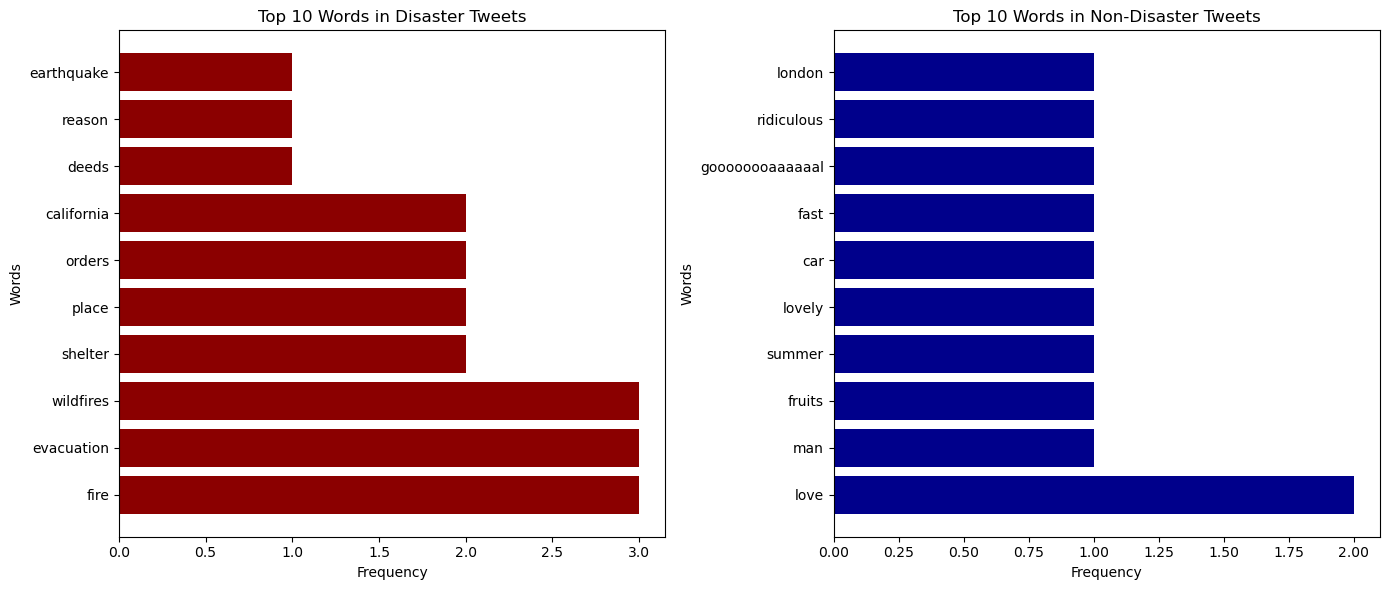

In [25]:
# Plotting the top 10 words in disaster and non-disaster tweets
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot disaster tweet word frequencies
axes[0].barh(disaster_words, disaster_freq, color='darkred')
axes[0].set_title('Top 10 Words in Disaster Tweets')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Words')

# Plot non-disaster tweet word frequencies
axes[1].barh(non_disaster_words, non_disaster_freq, color='darkblue')
axes[1].set_title('Top 10 Words in Non-Disaster Tweets')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Words')

plt.tight_layout()
plt.show()



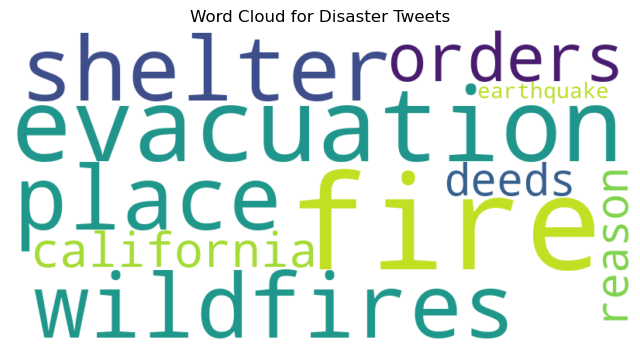

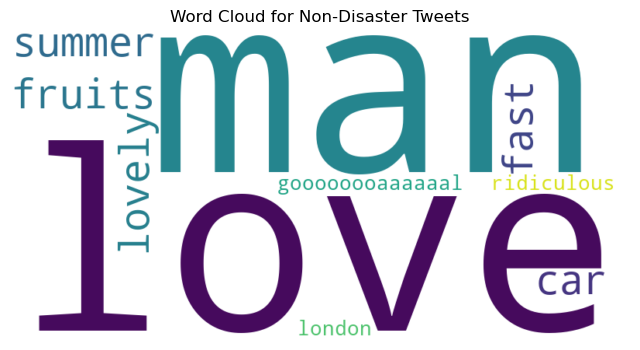

In [26]:
# Word cloud for Disaster Tweets
disaster_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(Counter(disaster_words))

# Displaying word cloud
plt.figure(figsize=(8, 6))
plt.imshow(disaster_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Disaster Tweets')
plt.show()

# Word cloud for Non-Disaster Tweets
non_disaster_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(Counter(non_disaster_words))

# Displaying word cloud
plt.figure(figsize=(8, 6))
plt.imshow(non_disaster_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Disaster Tweets')
plt.show()

In [27]:
# creating a function to generate a word list (corpus)

def generate_corpus(target_label):
    words = []
    for text in twitter[twitter['target'] == target_label]['text'].str.split():
        words.extend(text)
    return words

In [28]:
word_frequencies = []

In [29]:
# defining a function to calculate the most frequent words with their counts
def calculate_most_frequent_words(twitter, corpus_function, target_labels):
    for target in target_labels:
        words = corpus_function(target)
        word_count = defaultdict(int)
        
        # Count the occurrences of each word
        for word in words:
            word_count[word] += 1

        # Sorting the words by frequency and selecting top 10
        top_words = sorted(word_count.items(), key=lambda x: x[1], reverse=True)[:10]
        words, frequencies = zip(*top_words)
        word_frequencies.append((words, frequencies))

# Analyze
calculate_most_frequent_words(twitter, generate_corpus, [0, 1])


In [30]:
# Flatten the list for plotting
words_disaster = word_frequencies[0][0]
freq_disaster = word_frequencies[0][1]
words_non_disaster = word_frequencies[1][0]
freq_non_disaster = word_frequencies[1][1]

In [31]:
df = pd.DataFrame({
    'Words': words_disaster + words_non_disaster,
    'Frequency': list(freq_disaster) + list(freq_non_disaster),
    'Tweet Category': ['Disaster'] * len(words_disaster) + ['Non-Disaster'] * len(words_non_disaster)
})

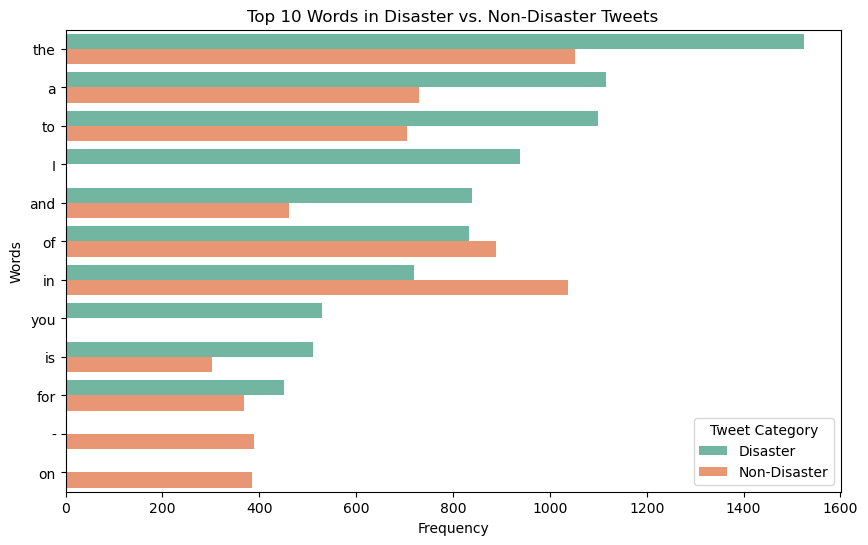

In [32]:
# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Words', hue='Tweet Category', data=df, palette='Set2')
plt.title("Top 10 Words in Disaster vs. Non-Disaster Tweets")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.legend(title='Tweet Category')
plt.show()

The Bar Chartsdisplays the top 10 stop words in tweets where **'the'** is most frequent in both groups

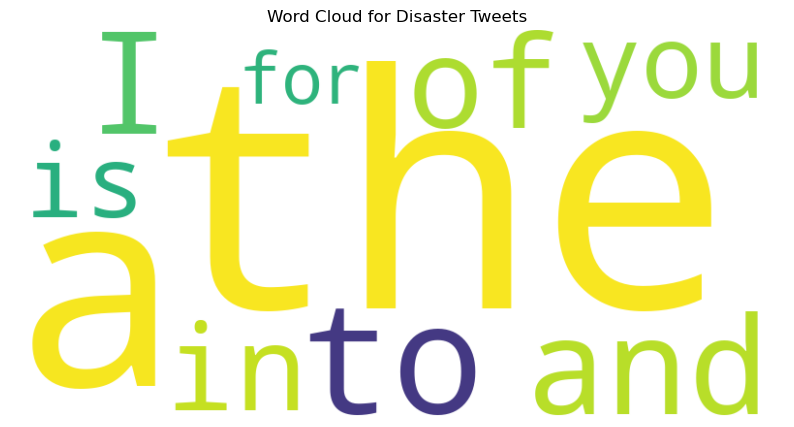

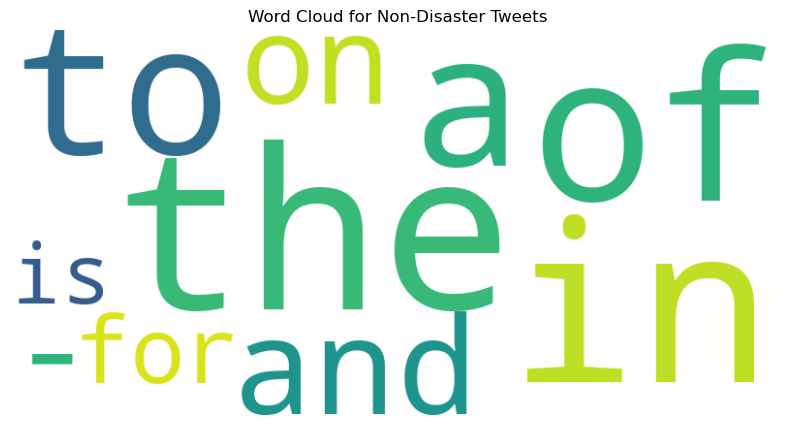

In [33]:
def generate_word_cloud(words, frequencies, title):
    word_freq = dict(zip(words, frequencies))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    
    # Ploting word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word cloud for disaster tweets
generate_word_cloud(words_disaster, freq_disaster, "Word Cloud for Disaster Tweets")

# Generate word cloud for non-disaster tweets
generate_word_cloud(words_non_disaster, freq_non_disaster, "Word Cloud for Non-Disaster Tweets")

## Visualising most common punctuations in the text data

In [34]:
import string

# Function to create a corpus from the target label
def create_corpus(target):
    corpus = []
    for tweet in twitter[twitter['target'] == target]['text']:
        words = tweet.split()
        corpus.extend(words)
    return corpus



In [35]:
# Function to count punctuation marks
def count_punctuations(corpus):
    punctuations = string.punctuation
    return [word for word in corpus if word in punctuations]

# Count punctuation marks for disaster and non-disaster tweets
disaster_corpus = create_corpus(1)
non_disaster_corpus = create_corpus(0)



In [36]:
# Count punctuation occurrences
disaster_punctuation = count_punctuations(disaster_corpus)
non_disaster_punctuation = count_punctuations(non_disaster_corpus)

# Count frequency of each punctuation
disaster_punc_count = Counter(disaster_punctuation)
non_disaster_punc_count = Counter(non_disaster_punctuation)

disaster_punctuation , non_disaster_punctuation , disaster_punc_count , non_disaster_punc_count


(['=>',
  '-',
  '-',
  ':',
  '-',
  '?',
  '.',
  '|',
  '-',
  '+',
  '+',
  '#',
  '-',
  '|',
  '-',
  '.',
  '|',
  '|',
  '|',
  '-',
  '-',
  '-',
  '-',
  ':',
  '.',
  '|',
  '|',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  ':',
  '-',
  '!',
  ']',
  '-',
  '-',
  '-',
  '|',
  '|',
  '|',
  ')',
  '-',
  '|',
  '|',
  "'",
  '-',
  ';',
  '-',
  ':',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  ':',
  '?',
  '-',
  '-',
  '-',
  '-',
  '-',
  '/',
  '-',
  '+',
  '#',
  '-',
  '.',
  '=',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '|',
  '-',
  '-',
  '-',
  '-',
  '-',
  '/',
  '/',
  '/',
  '/',
  ':',
  '/',
  '/',
  '/',
  '-',
  '/',
  '-',
  '/',
  '-',
  '-',
  '-',
  '@',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  ':',
  '|',
  '-',
  '-',
  '-',
  '-',
  '|',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '|',
  '|'

In [37]:
# Creating dataframes
disaster_punc_df = pd.DataFrame(disaster_punc_count.items(), columns=["Punctuation", "Count"]).sort_values(by="Count", ascending=False).head(10)
non_disaster_punc_df = pd.DataFrame(non_disaster_punc_count.items(), columns=["Punctuation", "Count"]).sort_values(by="Count", ascending=False).head(10)

disaster_punc_df , non_disaster_punc_df

(   Punctuation  Count
 1            -    389
 5            |     51
 2            :     31
 13           /     18
 16           ~     14
 3            ?     11
 15           @      9
 4            .      7
 6            +      7
 8            !      6,
    Punctuation  Count
 0            -    374
 1            |     91
 2            :     30
 7            ?     26
 4            +     24
 3            @     18
 10           /     17
 12           =     13
 9            !     12
 5            .     12)

C:\Users\vipin\AppData\Local\Temp\ipykernel_23716\2180947549.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\vipin\AppData\Local\Temp\ipykernel_23716\2180947549.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




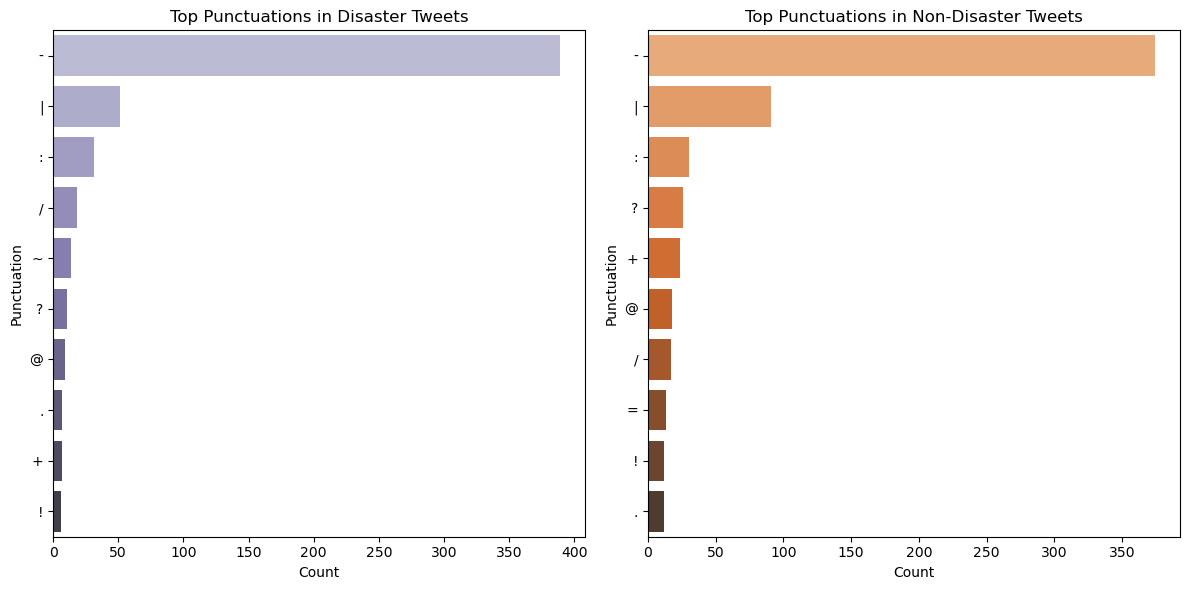

In [38]:
plt.figure(figsize=(12, 6))

# Plotting disaster tweet punctuations
plt.subplot(1, 2, 1)
sns.barplot(x="Count", y="Punctuation", data=disaster_punc_df, palette="Purples_d")
plt.title("Top Punctuations in Disaster Tweets")

# Plotting non-disaster tweet punctuations
plt.subplot(1, 2, 2)
sns.barplot(x="Count", y="Punctuation", data=non_disaster_punc_df, palette="Oranges_d")
plt.title("Top Punctuations in Non-Disaster Tweets")

plt.tight_layout()
plt.show()

As observed from the plots the most occuring punctuations in both disaster/non-disaster tweets is '-' (350+) and '|'    

# Data Cleaning

In [39]:
# Function to clean text
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove special characters
    return text.lower().strip()

# Clean text and keyword columns
twitter['cleaned_text'] = twitter['text'].apply(clean_text)
twitter['keyword'] = twitter['keyword'].fillna('')
twitter['cleaned_keyword'] = twitter['keyword'].apply(lambda k: k.replace('%20', ' ').strip().lower())

twitter['cleaned_text']

0       our deeds are the reason of this earthquake ma...
1                   forest fire near la ronge sask canada
2       all residents asked to shelter in place are be...
3       13000 people receive wildfires evacuation orde...
4       just got sent this photo from ruby alaska as s...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609    the out of control wild fires in california ev...
7610                 m194 0104 utc5km s of volcano hawaii
7611    police investigating after an ebike collided w...
7612    the latest more homes razed by northern califo...
Name: cleaned_text, Length: 7613, dtype: object

In [40]:
twitter.head(10)

,id,keyword,location,text,target,cleaned_text,cleaned_keyword
0,1,,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,
1,4,,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,
2,5,,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,
3,6,,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,
4,7,,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,
5,8,,NaN,#RockyFire Update => California Hwy. 20 closed...,1,rockyfire update california hwy 20 closed in ...,
6,10,,NaN,#flood #disaster Heavy rain causes flash flood...,1,flood disaster heavy rain causes flash floodin...,
7,13,,NaN,I'm on top of the hill and I can see a fire in...,1,im on top of the hill and i can see a fire in ...,
8,14,,NaN,There's an emergency evacuation happening now ...,1,theres an emergency evacuation happening now i...,
9,15,,NaN,I'm afraid that the tornado is coming to our a...,1,im afraid that the tornado is coming to our area,


In [41]:

from nltk.corpus import stopwords

def clean_text(text):
    # Remove special characters, numbers, etc.
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.lower() 
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

# Apply the cleaning function
twitter['Cleaned_text'] = twitter['text'].apply(clean_text)


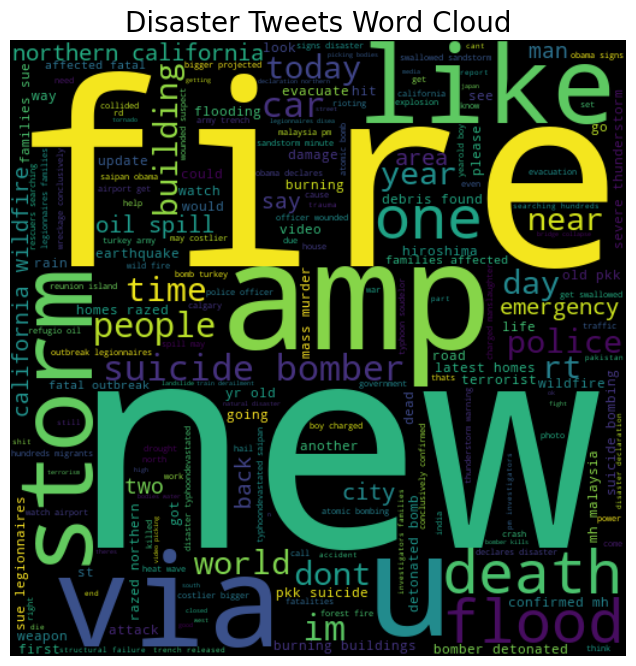

In [42]:
def wordcloud(twitter, title):
    words = ' '.join(twitter['Cleaned_text'].astype('str').tolist())
    stopwords_set = set(stopwords.words('english'))
    wc = WordCloud(stopwords=stopwords_set, width=512, height=512).generate(words)
    plt.figure(figsize=(10, 8), frameon=True)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

# Filter disaster tweets
data_disaster = twitter[twitter['target'] == 1]
data_non_disaster = twitter[twitter['target'] == 0]

# show word cloud for disaster tweets
wordcloud(data_disaster, "Disaster Tweets Word Cloud")


In [43]:
# Analyze the most frequent keywords for disaster-related tweets
disaster_keywords = twitter[twitter['target'] == 1]['keyword'].dropna()


In [44]:
# top 10 most common keywords
top_keywords = disaster_keywords.value_counts().head(10)


C:\Users\vipin\AppData\Local\Temp\ipykernel_23716\1662965792.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




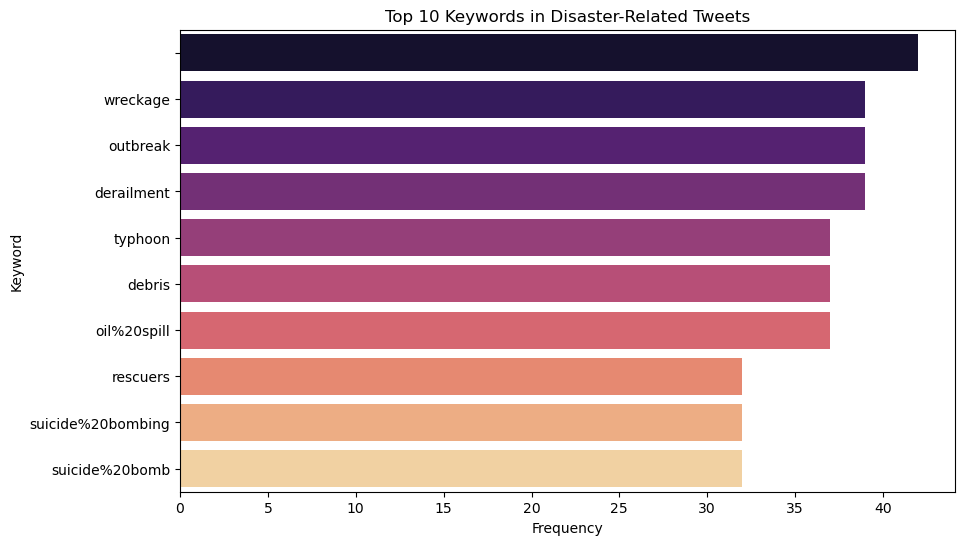

keyword
                     42
wreckage             39
outbreak             39
derailment           39
typhoon              37
debris               37
oil%20spill          37
rescuers             32
suicide%20bombing    32
suicide%20bomb       32
Name: count, dtype: int64

In [45]:
# Ploting top 10 keywords
plt.figure(figsize=(10, 6))
sns.barplot(y=top_keywords.index, x=top_keywords.values, palette='magma')
plt.title('Top 10 Keywords in Disaster-Related Tweets')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()

top_keywords

# Top Keywords in Disaster-Related Tweets

The most frequent keywords include:

derailment, wreckage, and outbreak (39 occurrences each).
debris, oil spill, and typhoon (around 37 occurrences each).
Keywords like evacuated, suicide bombing, and rescuers are also prominent.

##  Spliting original data after cleaning 

In [46]:
#original data after cleaning 
X_inp_clean = twitter['Cleaned_text']
X_inp_original = twitter['text']
y_inp = twitter['target']

# Tokenization

In [47]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Tokenize the cleaned text
twitter['tokens'] = twitter['cleaned_text'].apply(word_tokenize)
print(twitter[['cleaned_text', 'tokens']].head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vipin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                        cleaned_text  \
0  our deeds are the reason of this earthquake ma...   
1              forest fire near la ronge sask canada   
2  all residents asked to shelter in place are be...   
3  13000 people receive wildfires evacuation orde...   
4  just got sent this photo from ruby alaska as s...   

                                              tokens  
0  [our, deeds, are, the, reason, of, this, earth...  
1      [forest, fire, near, la, ronge, sask, canada]  
2  [all, residents, asked, to, shelter, in, place...  
3  [13000, people, receive, wildfires, evacuation...  
4  [just, got, sent, this, photo, from, ruby, ala...  


In [48]:
# Confirm the unique values
print("\nUnique Values in Target Column:", twitter['target'].unique())



Unique Values in Target Column: [1 0]


## Spliting data into training and validation dataset

Using scikit-learn's train_test_split to split the data into training and validation dataset

In [49]:
X= twitter['Cleaned_text']
X_original = twitter['text']
y= twitter['target']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (6090,)
Testing set size: (1523,)


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample training data (list of text documents)
X_train = ["This is a disaster tweet.", "Another non-disaster tweet."]
X_test = ["This is a test tweet."]

# Initialize the vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data (no fitting, only transformation)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Print the shape of the transformed data
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)


(2, 5)
(1, 5)


In [52]:
# Create features: tweet length, presence of hashtags, and mentions
twitter['tweet_length'] = twitter['cleaned_text'].apply(len)
twitter['hashtag_count'] = twitter['text'].apply(lambda x: x.count('#'))
twitter['mention_count'] = twitter['text'].apply(lambda x: x.count('@'))



In [53]:
X_train = pd.DataFrame(X_train)  # Convert to DataFrame if it's a list
X_test = pd.DataFrame(X_test)    # Convert to DataFrame if it's a list

# Now reset index if necessary
X_train_reset = X_train.reset_index(drop=True)
X_test_reset = X_test.reset_index(drop=True)

# Split additional features into train and test sets
additional_features = ['tweet_length', 'hashtag_count', 'mention_count']

# Use the reset index to align with twitter DataFrame
X_additional_train = twitter.loc[X_train_reset.index, additional_features].to_numpy()
X_additional_test = twitter.loc[X_test_reset.index, additional_features].to_numpy()

In [54]:
# Combine TF-IDF features with additional features
import scipy
X_train_combined = scipy.sparse.hstack([X_train_tfidf, X_additional_train])
X_test_combined = scipy.sparse.hstack([X_test_tfidf, X_additional_test])

print("Combined Features - Training Set Shape:", X_train_combined.shape)
print("Combined Features - Testing Set Shape:", X_test_combined.shape)

Combined Features - Training Set Shape: (2, 8)
Combined Features - Testing Set Shape: (1, 8)


In [55]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


In [56]:
from textblob import TextBlob

# Calculate sentiment polarity for each tweet
twitter['sentiment'] = twitter['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Add sentiment to combined features
X_sentiment_train = twitter.loc[X_train.index, 'sentiment'].values.reshape(-1, 1)
X_sentiment_test = twitter.loc[X_test.index, 'sentiment'].values.reshape(-1, 1)

X_train_combined = scipy.sparse.hstack([X_train_combined, X_sentiment_train])
X_test_combined = scipy.sparse.hstack([X_test_combined, X_sentiment_test])

print("Final Combined Features - Training Set Shape:", X_train_combined.shape)
print("Final Combined Features - Testing Set Shape:", X_test_combined.shape)


Final Combined Features - Training Set Shape: (2, 9)
Final Combined Features - Testing Set Shape: (1, 9)


In [57]:
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


Now let's create functions to display model's classification and confusion matrix

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


def c_report(y_true,y_pred):
    print("Classifictaion Report")
    print(classification_report(y_true, y_pred))
    acc_scr = accuracy_score(y_true, y_pred)
    print("Accuracy : "+ str(acc_scr))
    return acc_scr

def plot_cm(y_true,y_pred,cmap = "Blues"):
    mtx = confusion_matrix(y_true, y_pred)
    sns.heatmap(mtx, annot = True, fmt='d', linewidth=0.5,
               cmap=cmap, cbar = False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize models
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(probability=True, random_state=42)

# List of models
models = {
    'Logistic Regression': logistic_model,
    'Random Forest': random_forest_model,
    'SVM': svm_model
}


In [60]:
# Check dimensions
print(f"Number of samples in X_train_combined: {X_train_combined.shape[0]}")
print(f"Number of samples in y_train: {len(y_train)}")
print(f"Number of samples in X_test_combined: {X_test_combined.shape[0]}")
print(f"Number of samples in y_test: {len(y_test)}")


Number of samples in X_train_combined: 2
Number of samples in y_train: 6090
Number of samples in X_test_combined: 1
Number of samples in y_test: 1523


## Creating function to encode data using BoW or TF-IDF

In [61]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def encoding(train_data, valid_data, bow=False, n=1, tf_idf=False):

    # Validate encoding choice
    if not bow and not tf_idf:
        raise ValueError("Specify at least one encoding method: 'bow' or 'tf_idf'.")
    if bow and tf_idf:
        raise ValueError("Only one of 'bow' or 'tf_idf' can be True.")
    
    # Select vectorizer
    if bow:
        vectorizer = CountVectorizer(ngram_range=(n, n))
    elif tf_idf:
        vectorizer = TfidfVectorizer(ngram_range=(n, n), use_idf=True, smooth_idf=True, sublinear_tf=True)
    
    # Fit on training data and transform both train and validation sets
    train_transformed = vectorizer.fit_transform(train_data)
    valid_transformed = vectorizer.transform(valid_data)
    
    # Convert to pandas DataFrame
    train_df = pd.DataFrame(train_transformed.toarray(), columns=vectorizer.get_feature_names_out())
    valid_df = pd.DataFrame(valid_transformed.toarray(), columns=vectorizer.get_feature_names_out())
    
    return train_df, valid_df


## Encoding training and validation data

#We encode our data in all possible combinations provided by our function

In [62]:
X_train_bow1 , X_valid_bow1 = encoding(X_train,X_valid,bow=True) 
X_train_bow2 , X_valid_bow2 = encoding(X_train,X_valid,bow=True,n=2) 
X_train_bow3 , X_valid_bow3 = encoding(X_train,X_valid,bow=True,n=3) 
X_train_tfidf1 , X_valid_tfidf1 = encoding(X_train,X_valid,tf_idf=True) 
X_train_tfidf2 , X_valid_tfidf2 = encoding(X_train,X_valid,tf_idf=True,n=2) 
X_train_tfidf3 , X_valid_tfidf3 = encoding(X_train,X_valid,tf_idf=True,n=3)

#  LOGISTIC REGRESSIOn

In [63]:
logreg = LogisticRegression()
logreg.fit(X_train_bow1,y_train)
pred_logreg = logreg.predict(X_valid_bow1)

print("Predictions:", pred_logreg)

Predictions: [0 0 0 ... 1 1 1]


Printing classification report and ploting confusion matrix for the predictions made by LogisticRegression(BoW,n-grams=1) model

Classifictaion Report
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       874
           1       0.79      0.71      0.75       649

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.79      1523

Accuracy : 0.7964543663821405


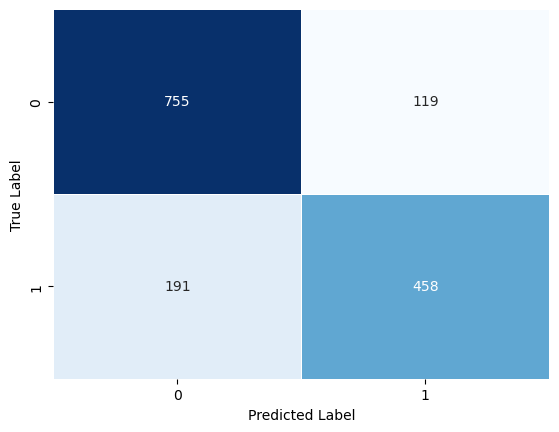

In [64]:
bow1_logreg = c_report(y_valid,pred_logreg)
plot_cm(y_valid,pred_logreg)

Now training another Logistic Regression model with n-grams=2 and BoW 

In [65]:
bow2_logreg = LogisticRegression()
bow2_logreg.fit(X_train_bow2,y_train)
pred_bow2_logreg = bow2_logreg.predict(X_valid_bow2)

print("Predictions:", pred_bow2_logreg)

Predictions: [0 0 0 ... 1 1 1]


Classifictaion Report
              precision    recall  f1-score   support

           0       0.70      0.96      0.81       874
           1       0.89      0.44      0.59       649

    accuracy                           0.74      1523
   macro avg       0.79      0.70      0.70      1523
weighted avg       0.78      0.74      0.72      1523

Accuracy : 0.7386736703873933


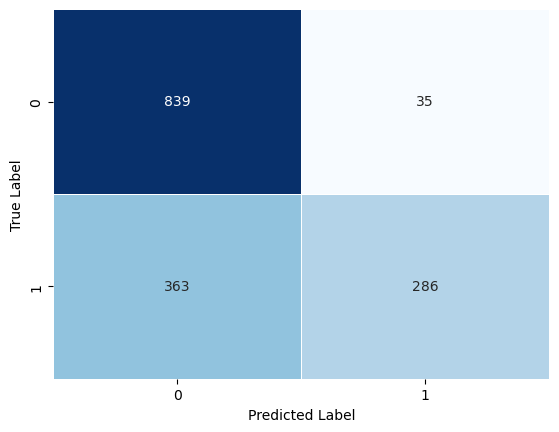

In [66]:
bow2_logreg = c_report(y_valid,pred_bow2_logreg)
plot_cm(y_valid,pred_bow2_logreg)

From the above results it's clear that using n = 1 will always give us more accuray,  
now let's use tfidf approach with n = 1 to train our Logistic Regression model

In [67]:
tfidf1_logreg = LogisticRegression(C=1.0)
tfidf1_logreg.fit(X_train_tfidf1,y_train)
pred_tfidf1_logreg = tfidf1_logreg.predict(X_valid_tfidf1)

print("Predictions:", pred_tfidf1_logreg)

Predictions: [0 0 1 ... 1 1 0]


Printing classification report and ploting confusion matrix for the predictions made by LogisticRegression(TF-IDF,n-grams=1) model

Classifictaion Report
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       874
           1       0.81      0.67      0.74       649

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.78      1523
weighted avg       0.80      0.80      0.79      1523

Accuracy : 0.7951411687458962


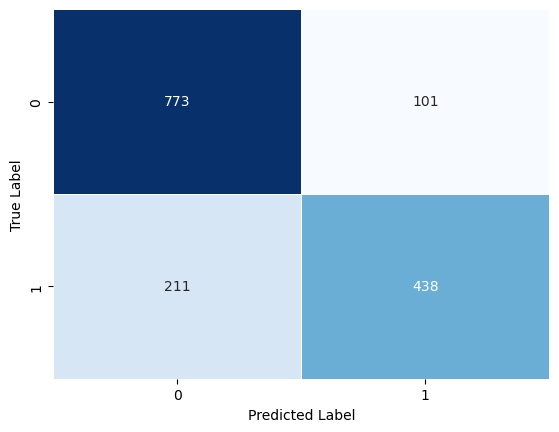

In [68]:
tfidf1_logreg = c_report(y_valid,pred_tfidf1_logreg)
plot_cm(y_valid,pred_tfidf1_logreg)

# Multinomial Naive Bayes

In [69]:
from sklearn.naive_bayes import MultinomialNB


bow1_NB = MultinomialNB(alpha=0.7)
bow1_NB.fit(X_train_bow1,y_train)
pred_bow1_NB = bow1_NB.predict(X_valid_bow1)

print("Predictions:", pred_bow1_NB)

Predictions: [0 0 1 ... 1 1 1]


Printing classification report and ploting confusion matrix  for the predictions of MultinomialNB(BoW,n-grams=1) model

Classifictaion Report
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       874
           1       0.77      0.71      0.74       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523

Accuracy : 0.7879185817465528


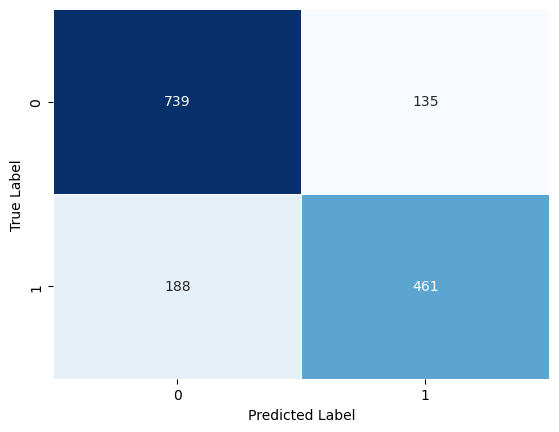

In [70]:
bow1_NB = c_report(y_valid,pred_bow1_NB)
plot_cm(y_valid,pred_bow1_NB)

In [71]:
tfidf1_NB = MultinomialNB(alpha=0.7)
tfidf1_NB.fit(X_train_tfidf1,y_train)
pred_tfidf1_NB = tfidf1_NB.predict(X_valid_tfidf1)

print("Predictions:", pred_tfidf1_NB)

Predictions: [0 0 0 ... 1 1 0]


Printing classification report and ploting confusion matrix for the predictions of MultinomialNB(TF-IDF,n-grams=1) model

Classifictaion Report
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       874
           1       0.83      0.67      0.74       649

    accuracy                           0.80      1523
   macro avg       0.81      0.78      0.79      1523
weighted avg       0.80      0.80      0.80      1523

Accuracy : 0.7997373604727511


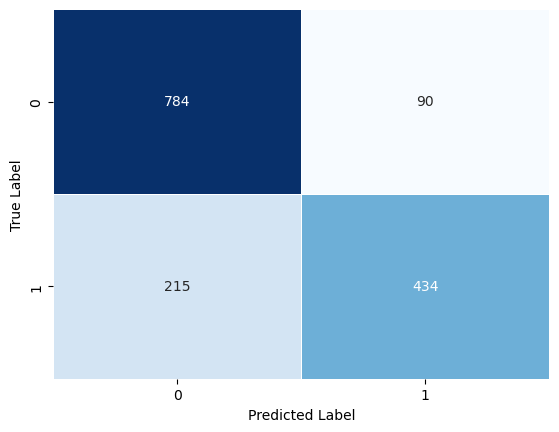

In [72]:
tfidf1_NB = c_report(y_valid,pred_tfidf1_NB)
plot_cm(y_valid,pred_tfidf1_NB)

## Random Forest Classifier

In [73]:
tfidf1_RFC = RandomForestClassifier()
tfidf1_RFC.fit(X_train_tfidf1,y_train)
pred_tfidf1_RFC = tfidf1_RFC.predict(X_valid_tfidf1)


print("Predictions:", pred_tfidf1_RFC)

Predictions: [0 0 1 ... 1 1 0]


Printing classification report and ploting confusion matrix for predictions of RandomForestClassifier model

Classifictaion Report
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       874
           1       0.77      0.67      0.71       649

    accuracy                           0.77      1523
   macro avg       0.77      0.76      0.76      1523
weighted avg       0.77      0.77      0.77      1523

Accuracy : 0.7728168089297439


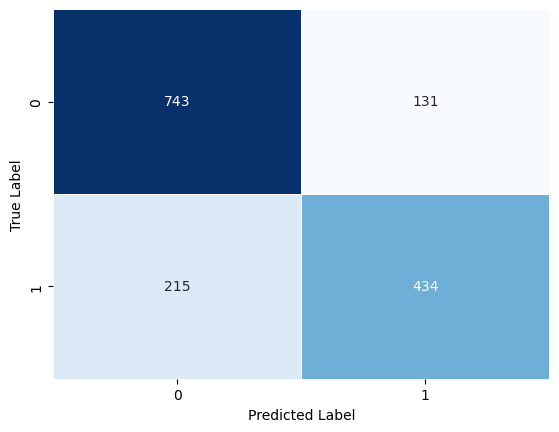

In [74]:
ttfidf1_RFC = c_report(y_valid,pred_tfidf1_RFC)
plot_cm(y_valid,pred_tfidf1_RFC)

## eXtreme Gradient Boosting Classifier

In [75]:
pip install xgboost


In [76]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
tfidf1_XGB = XGBClassifier(eval_metric='mlogloss')
tfidf1_XGB.fit(X_train_tfidf1, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [77]:
pred_tfidf1_XGB = tfidf1_XGB.predict(X_valid_tfidf1)
print("Predictions:", pred_tfidf1_XGB)

Predictions: [0 0 0 ... 1 1 0]


Printing classification report and ploting confusion matrix for the predictions made by the XGBClassifier model

Classifictaion Report
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       874
           1       0.79      0.58      0.67       649

    accuracy                           0.76      1523
   macro avg       0.77      0.73      0.74      1523
weighted avg       0.76      0.76      0.75      1523

Accuracy : 0.7557452396585687


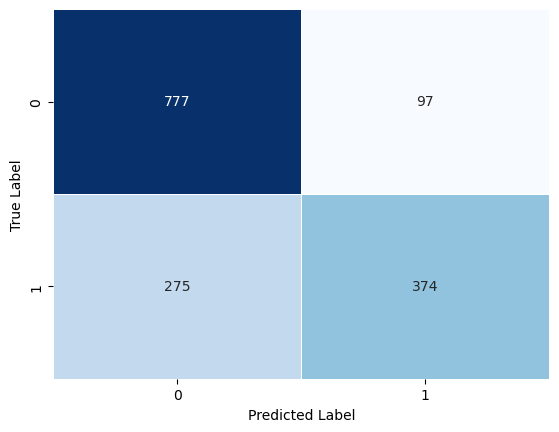

In [78]:
ttfidf1_XGB = c_report(y_valid,pred_tfidf1_XGB)
plot_cm(y_valid,pred_tfidf1_XGB)

## CatBoostClassifier

In [79]:
pip install catboost


In [80]:
from catboost import CatBoostClassifier

In [81]:
tfidf1_CBC = CatBoostClassifier(iterations=100)
tfidf1_CBC.fit(X_train_tfidf1,y_train)
pred_tfidf1_CBC = tfidf1_CBC.predict(X_valid_tfidf1)

print("prediction : ", pred_tfidf1_CBC)


Learning rate set to 0.184063
0:	learn: 0.6747926	total: 267ms	remaining: 26.5s
1:	learn: 0.6619264	total: 373ms	remaining: 18.3s
2:	learn: 0.6523156	total: 485ms	remaining: 15.7s
3:	learn: 0.6428212	total: 590ms	remaining: 14.2s
4:	learn: 0.6369201	total: 687ms	remaining: 13.1s
5:	learn: 0.6284806	total: 796ms	remaining: 12.5s
6:	learn: 0.6221219	total: 894ms	remaining: 11.9s
7:	learn: 0.6190760	total: 1s	remaining: 11.5s
8:	learn: 0.6144721	total: 1.13s	remaining: 11.4s
9:	learn: 0.6097474	total: 1.25s	remaining: 11.2s
10:	learn: 0.6055729	total: 1.37s	remaining: 11.1s
11:	learn: 0.6019251	total: 1.49s	remaining: 10.9s
12:	learn: 0.5967121	total: 1.64s	remaining: 11s
13:	learn: 0.5934801	total: 1.79s	remaining: 11s
14:	learn: 0.5911581	total: 2s	remaining: 11.4s
15:	learn: 0.5890483	total: 2.11s	remaining: 11.1s
16:	learn: 0.5862150	total: 2.26s	remaining: 11.1s
17:	learn: 0.5837539	total: 2.41s	remaining: 11s
18:	learn: 0.5795518	total: 2.58s	remaining: 11s
19:	learn: 0.5775372	tota

Printing classification report and ploting confusion matrix for the predictions made by the above model

Classifictaion Report
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       874
           1       0.80      0.63      0.71       649

    accuracy                           0.78      1523
   macro avg       0.78      0.76      0.76      1523
weighted avg       0.78      0.78      0.77      1523

Accuracy : 0.7767564018384767


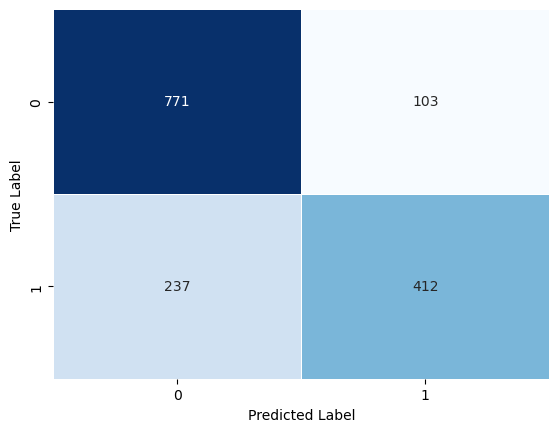

In [82]:
ttfidf1_CBC = c_report(y_valid,pred_tfidf1_CBC)
plot_cm(y_valid,pred_tfidf1_CBC)

## Support Vector CLassifier 

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


model_tfidf1_SVC = SVC(kernel='linear', gamma='auto')
model_tfidf1_SVC.fit(X_train_tfidf1, y_train)

# Predict on validation data
pred_tfidf1_SVC = model_tfidf1_SVC.predict(X_valid_tfidf1)

# Evaluate performance
print("Predictions:", pred_tfidf1_SVC)


Printing classification report and ploting confusion matrix for the SVC model

Classifictaion Report
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       874
           1       0.77      0.71      0.74       649

    accuracy                           0.79      1523
   macro avg       0.78      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523

Accuracy : 0.7866053841103086


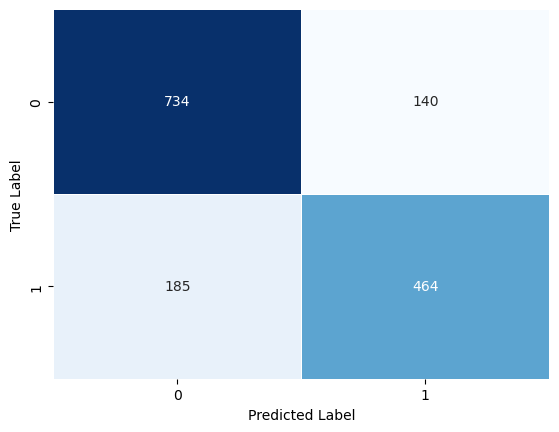

In [ ]:
ttfidf1_SVC = c_report(y_valid,pred_tfidf1_SVC)
plot_cm(y_valid,pred_tfidf1_SVC)

## Voting Classifier

In [ ]:

from sklearn.ensemble import VotingClassifier


model_list = []
model_list.append(('Logistic Regression', LogisticRegression()))
model_list.append(('Naive Bayes', MultinomialNB(alpha=0.7)))
model_list.append(('XGBoost', XGBClassifier(eval_metric='mlogloss')))

# Creating the Voting Classifier with 'soft' voting
ensemble_model = VotingClassifier(estimators=model_list, voting='soft')

# Training the ensemble model
ensemble_model.fit(X_train_tfidf1, y_train)

# Making predictions on the validation set
pred_tfidf1_VC = ensemble_model.predict(X_valid_tfidf1)


Printing classification report and ploting confusion matrix for VotingClasssifier

Classifictaion Report
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       874
           1       0.85      0.66      0.74       649

    accuracy                           0.80      1523
   macro avg       0.82      0.78      0.79      1523
weighted avg       0.81      0.80      0.80      1523

Accuracy : 0.8036769533814839


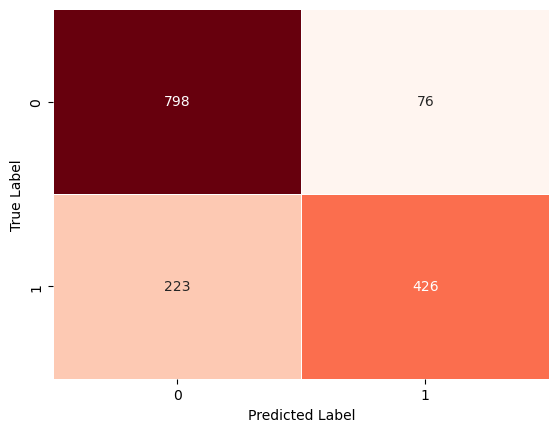

In [ ]:
tfidf1_VC = c_report(y_valid,pred_tfidf1_VC)
plot_cm(y_valid,pred_tfidf1_VC,cmap = "Reds")

In [ ]:
import joblib

# Save the model
joblib.dump(ensemble_model, 'voting_classifier.pkl')


['voting_classifier.pkl']

# Comparing the Accuracy of all models

In [ ]:
results = pd.DataFrame([
    ["Logistic Regression BoW1", bow1_logreg],
    ["Logistic Regression BoW2", bow2_logreg],
    ["Logistic Regression Tf-Idf1", tfidf1_logreg],
    ["Naive Bayes Tf-Idf1", tfidf1_NB],
    ["Random Forest Tf-Idf1", ttfidf1_RFC],
    ["XGBClassifier Tf-Idf1", ttfidf1_XGB],
    ["CatBoost Tf-Idf1", ttfidf1_CBC],
    ["SVC Tf-Idf1", ttfidf1_SVC],
    ["Voting Tf-Idf1", tfidf1_VC]
], columns=["Models", "Accuracy Score"]).sort_values(by='Accuracy Score', ascending=False)

results.style.background_gradient(cmap='viridis', subset=['Accuracy Score'])


,Models,Accuracy Score
8,Voting Tf-Idf1,0.803677
3,Naive Bayes Tf-Idf1,0.799737
0,Logistic Regression BoW1,0.796454
2,Logistic Regression Tf-Idf1,0.795141
7,SVC Tf-Idf1,0.786605
6,CatBoost Tf-Idf1,0.776756
4,Random Forest Tf-Idf1,0.772160
5,XGBClassifier Tf-Idf1,0.755745
1,Logistic Regression BoW2,0.738674


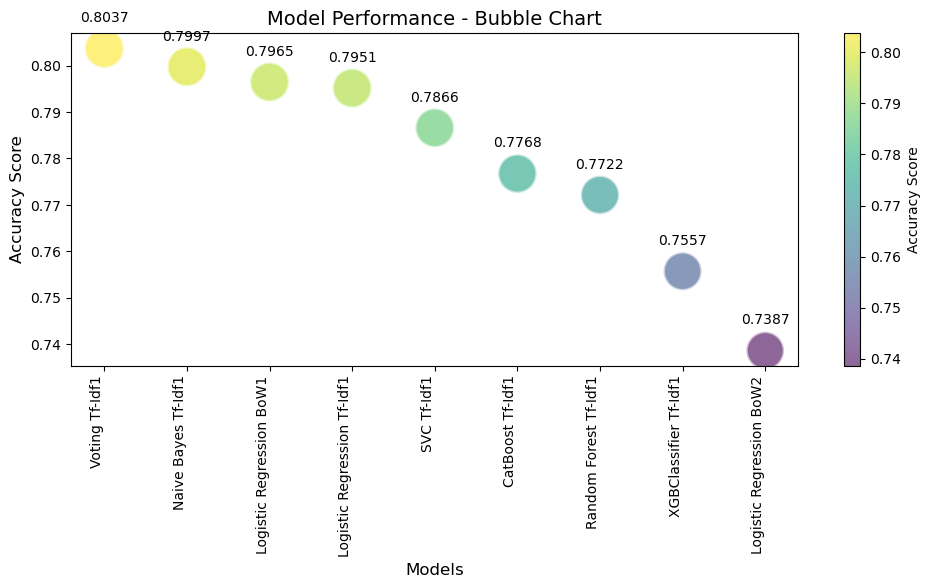

In [ ]:
# Data for plotting
labels = results['Models'].values
values = results['Accuracy Score'].values

bubble_size = values * 1000 
bubble_color = values

# Creating the Bubble Chart
plt.figure(figsize=(10, 6))
scatter = plt.scatter(labels, values, s=bubble_size, c=bubble_color, cmap='viridis', alpha=0.6, edgecolors="w", linewidth=2)
plt.colorbar(scatter, label='Accuracy Score')

for i, label in enumerate(labels):
    plt.text(labels[i], values[i] + 0.005, f'{values[i]:.4f}', ha='center', va='bottom', fontsize=10)

plt.title('Model Performance - Bubble Chart', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


# Conclusion

Among all Simple classification models used above Voting Classifier performed best with tf-idf and ngrams = 1

## DEEP LEARNING

In [ ]:
pip install transformers


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Conv1D, Dropout, MaxPooling1D, Flatten, Dense, Input, Bidirectional, LSTM, GlobalMaxPool1D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModel
from sklearn.model_selection import train_test_split
import keras_tuner as kt

Preprocess and Tokenize Text

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_inp_clean.values)
vocab_size = len(tokenizer.word_index) + 1

vocab_size

21358

In [ ]:
def encode_text(corpus):
    return tokenizer.texts_to_sequences(corpus)


In [ ]:
longest_input_text = max(X_inp_clean.values, key=lambda sentence: len(sentence.split()))
longest_input_text

'rite man tlk widout nuh curfew long side aka cum fi steal di show itz rubbery di whole dem fi knw sound music'

In [ ]:
max_sequence_length = len(longest_input_text.split())
max_sequence_length

23

In [ ]:
padded_data = pad_sequences(encode_text(X_inp_clean.values), maxlen=max_sequence_length, padding='post')

## Using Glove word embeddings for creating Embedding Matrix

In [ ]:
# Load pre-trained GloVe embeddings
embedding_dict = dict()
embedding_dimension = 300

with open("C:/Users/vipin/Downloads/glove.6B/glove.6B.300d.txt") as glove_file:
    for line in glove_file:
        word_vector = line.split()
        word = word_vector[0]
        embedding_values = np.asarray(word_vector[1:], dtype='float32')
        embedding_dict[word] = embedding_values


In [ ]:
# Initialize embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dimension))

for word, index in tokenizer.word_index.items():
    embedding_vector = embedding_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector


# Train-validation split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(padded_data, y_inp.values, test_size=0.2, random_state=1)

In [ ]:
# Function to visualize model history
def plot_model_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.legend(['Train', 'Test'], loc='upper left')

    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epochs')
    ax2.legend(['Train', 'Test'], loc='upper left')

    fig.suptitle("Model Training History")


# CNN model with hyperparameter tuning

In [ ]:
def cnn_model(hp):
    model = Sequential()

    model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))

    model.add(Conv1D(filters=hp.Int('conv_filters', min_value=32, max_value=256, step=32),
                     kernel_size=hp.Choice('conv_kernel', values=[3, 4, 5]),
                     activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())

    model.add(Dense(units=hp.Int('dense_units', min_value=64, max_value=256, step=32), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 1e-4])),
                  loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
# Hyperparameter tuning with Keras Tuner
cnn_tuner = kt.Hyperband(cnn_model, objective='val_accuracy', max_epochs=15, factor=3, directory='cnn_tuner', project_name='disaster_tweet_cnn')


Reloading Tuner from cnn_tuner\disaster_tweet_cnn\tuner0.json


Searching for a model with highest accuracy and saving it's hyperparameters

In [ ]:
cnn_tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=15, callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

In [ ]:
# Best model after tuning

best_cnn_model = cnn_tuner.get_best_models(num_models=1)[0]
best_cnn_model.summary()

c:\Users\vipin\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.

c:\Users\vipin\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 23, 300)        │     6,407,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 20, 32)         │        38,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 192)            │        61,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,507,657 (24.82 MB)

 Trainable params: 100,257 (391.63 KB)

 Non-trainable params: 6,407,400 (24.44 MB)

In [ ]:
# Training the model with early stopping and checkpointing

checkpoint_callback = ModelCheckpoint('best_cnn_model.keras', monitor='val_loss', save_best_only=True, verbose=1)


In [ ]:
history_cnn = best_cnn_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[checkpoint_callback, EarlyStopping(monitor='val_loss', patience=5)])

Epoch 1/50
187/191 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8752 - loss: 0.3040
Epoch 1: val_loss improved from inf to 0.48750, saving model to best_cnn_model.keras
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8749 - loss: 0.3043 - val_accuracy: 0.7912 - val_loss: 0.4875
Epoch 2/50
179/191 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9015 - loss: 0.2538
Epoch 2: val_loss did not improve from 0.48750
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9010 - loss: 0.2543 - val_accuracy: 0.7807 - val_loss: 0.5457
Epoch 3/50
181/191 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9086 - loss: 0.2204
Epoch 3: val_loss did not improve from 0.48750
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9085 - loss: 0.2209 - val_accuracy: 0.7859 - val_loss: 0.5816
Epoch 4/50
189/191 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9251 - loss: 0.1851
Epoch 4: val_loss did not improve from 0.48750
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9250 - loss: 0.1853 - va

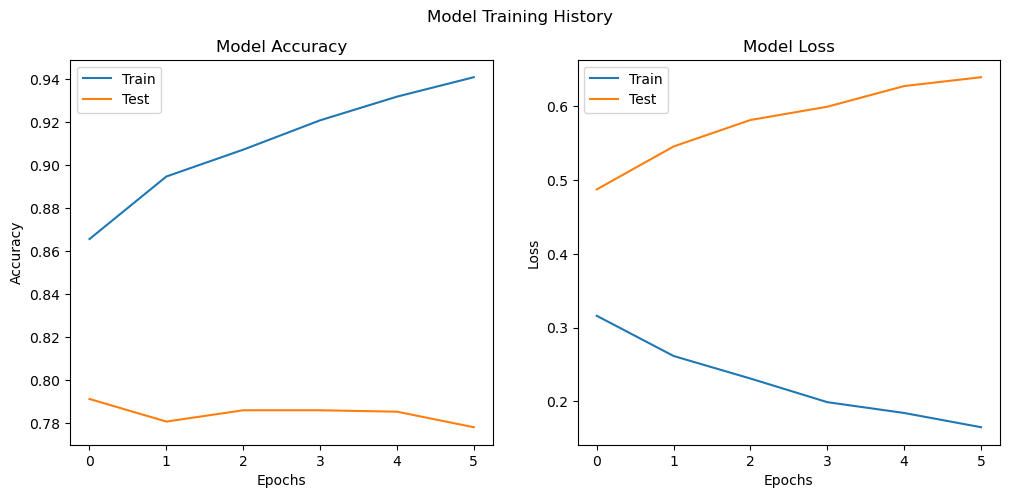

In [ ]:
# Plot CNN model history

plot_model_history(history_cnn)


## Multichannel CNN with hyperparameter tuning

In [ ]:
def multichannel_cnn(hp):
    input1 = Input(shape=(max_sequence_length,))
    embed1 = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False)(input1)
    conv1 = Conv1D(filters=hp.Int('conv_filters', min_value=32, max_value=256, step=32), kernel_size=hp.Choice('conv_kernel', values=[3, 4, 5]), activation='relu')(embed1)
    pool1 = MaxPooling1D()(conv1)
    flat1 = Flatten()(pool1)

    input2 = Input(shape=(max_sequence_length,))
    embed2 = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False)(input2)
    conv2 = Conv1D(filters=hp.Int('conv_filters', min_value=32, max_value=256, step=32), kernel_size=hp.Choice('conv_kernel', values=[3, 4, 5]), activation='relu')(embed2)
    pool2 = MaxPooling1D()(conv2)
    flat2 = Flatten()(pool2)

    merged = tf.keras.layers.concatenate([flat1, flat2])
    dense = Dense(units=hp.Int('dense_units', min_value=64, max_value=256, step=32), activation='relu')(merged)
    dropout = Dropout(0.5)(dense)
    output = Dense(1, activation='sigmoid')(dropout)

    model = Model(inputs=[input1, input2], outputs=output)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 1e-4])),
                  loss='binary_crossentropy', metrics=['accuracy'])

    return model



In [ ]:
# Hyperparameter tuning for Multichannel CNN

mcnn_tuner = kt.Hyperband(multichannel_cnn, objective='val_accuracy', max_epochs=15, factor=3, directory='mcnn_tuner', project_name='disaster_tweet_mcnn')


Reloading Tuner from mcnn_tuner\disaster_tweet_mcnn\tuner0.json


In [ ]:
mcnn_tuner.search([X_train, X_train], y_train, validation_data=([X_val, X_val], y_val), epochs=15, callbacks=[EarlyStopping(monitor='val_loss', patience=3)])


In [ ]:
# Best model after tuning
best_mcnn_model = mcnn_tuner.get_best_models(num_models=1)[0]
best_mcnn_model.summary()

c:\Users\vipin\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 23)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 23)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 23, 300)   │  6,407,400 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 23, 300)   │  6,407,400 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 21, 256)   │    230,656 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 21, 256)   │    230,656 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 10, 256)   │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 10, 256)   │          0 │ conv1d_1[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 2560)      │          0 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 2560)      │          0 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 5120)      │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │    655,488 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │        129 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 13,931,729 (53.15 MB)

 Trainable params: 1,116,929 (4.26 MB)

 Non-trainable params: 12,814,800 (48.88 MB)

In [ ]:
# Train Multichannel CNN model with early stopping and checkpointing
checkpoint_callback = ModelCheckpoint('best_mcnn_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

In [ ]:
history_mcnn = best_mcnn_model.fit([X_train, X_train], y_train, epochs=50, validation_data=([X_val, X_val], y_val), callbacks=[checkpoint_callback, EarlyStopping(monitor='val_loss', patience=5)])

Epoch 1/50


c:\Users\vipin\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning:

The structure of `inputs` doesn't match the expected structure: ['keras_tensor', 'keras_tensor_5']. Received: the structure of inputs=('*', '*')



191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8862 - loss: 0.2875
Epoch 1: val_loss improved from inf to 0.45803, saving model to best_mcnn_model.keras
191/191 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.8862 - loss: 0.2876 - val_accuracy: 0.8030 - val_loss: 0.4580
Epoch 2/50
189/191 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9083 - loss: 0.2497
Epoch 2: val_loss did not improve from 0.45803
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9083 - loss: 0.2497 - val_accuracy: 0.7951 - val_loss: 0.4666
Epoch 3/50
190/191 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9316 - loss: 0.2026
Epoch 3: val_loss did not improve from 0.45803
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9315 - loss: 0.2027 - val_accuracy: 0.7912 - val_loss: 0.4892
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9464 - loss: 0.1719
Epoch 4: val_loss did not improve from 0.45803
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9464 - loss: 0.1719 - val_

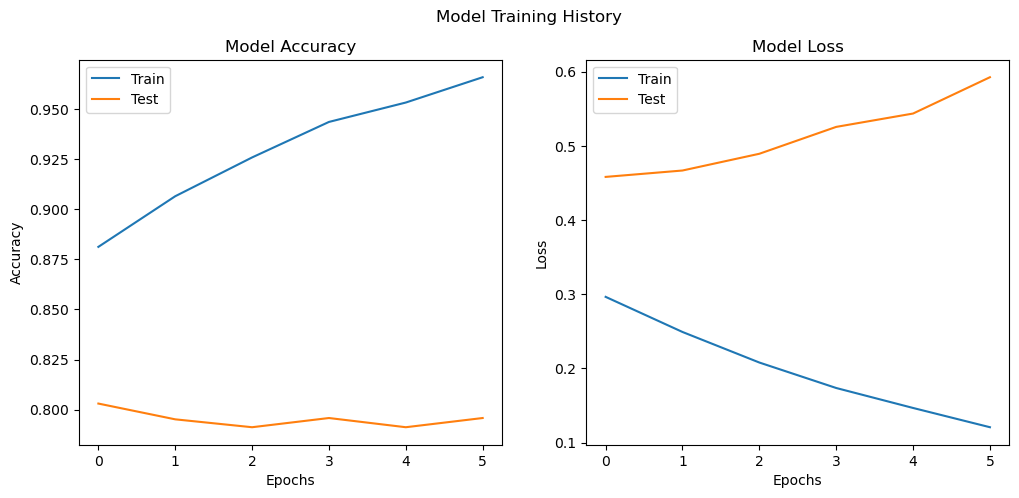

In [ ]:
# Plot Multichannel CNN model history

plot_model_history(history_mcnn)

## BiLSTM model with hyperparameter tuning

In [ ]:
def bilstm_model(hp):
    model = Sequential()
    model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
    model.add(Bidirectional(LSTM(units=hp.Int('lstm_units', min_value=32, max_value=256, step=32), return_sequences=True)))
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(units=hp.Int('dense_units', min_value=64, max_value=256, step=32), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 1e-4])),
                  loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
# Hyperparameter tuning for BiLSTM

bilstm_tuner = kt.Hyperband(bilstm_model, objective='val_accuracy', max_epochs=15, factor=3, directory='bilstm_tuner', project_name='disaster_tweet_bilstm')


Reloading Tuner from bilstm_tuner\disaster_tweet_bilstm\tuner0.json


In [ ]:
bilstm_tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=15, callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

In [ ]:
# Best model after tuning
best_bilstm_model = bilstm_tuner.get_best_models(num_models=1)[0]
best_bilstm_model.summary()

c:\Users\vipin\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 23, 300)        │     6,407,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 23, 64)         │        85,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,501,353 (24.80 MB)

 Trainable params: 93,825 (366.50 KB)

 Non-trainable params: 6,407,528 (24.44 MB)

In [ ]:
# Train BiLSTM model with early stopping and checkpointing
checkpoint_callback = ModelCheckpoint('best_bilstm_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

In [ ]:
history_bilstm = best_bilstm_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[checkpoint_callback, EarlyStopping(monitor='val_loss', patience=5)])

Epoch 1/50
190/191 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8705 - loss: 0.3097
Epoch 1: val_loss improved from inf to 0.46484, saving model to best_bilstm_model.keras
191/191 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.8705 - loss: 0.3097 - val_accuracy: 0.8188 - val_loss: 0.4648
Epoch 2/50
190/191 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8893 - loss: 0.2775
Epoch 2: val_loss did not improve from 0.46484
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.8892 - loss: 0.2776 - val_accuracy: 0.8194 - val_loss: 0.4770
Epoch 3/50
190/191 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9044 - loss: 0.2394
Epoch 3: val_loss did not improve from 0.46484
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9043 - loss: 0.2396 - val_accuracy: 0.7997 - val_loss: 0.5111
Epoch 4/50
190/191 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9025 - loss: 0.2403
Epoch 4: val_loss did not improve from 0.46484
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9025 - loss:

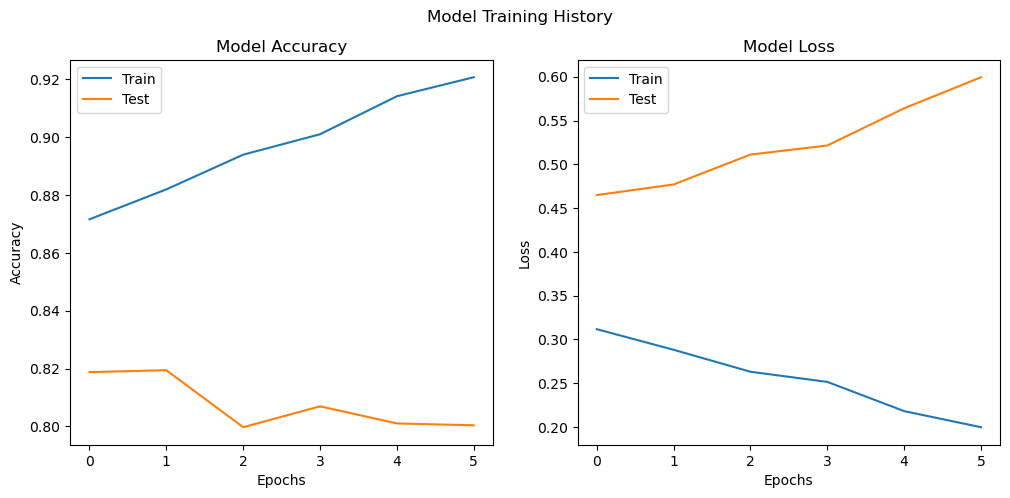

In [ ]:
# Plot BiLSTM model history

plot_model_history(history_bilstm)


In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from scipy.stats import randint

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Pipeline Setup (Text or Feature Vectorization)

In [ ]:
pipe = Pipeline([
    ('vectorizer', TfidfVectorizer()),  # Text vectorization
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))  # Classifier
])



In [ ]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('clf', RandomForestClassifier(random_state=42))])

## Hyperparameter Tuning using GridSearchCV

In [ ]:
param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [10, 20, 30, None],
    'clf__min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__max_depth': [10, 20, 30, None],
                         'clf__min_samples_split': [2, 5, 10],
                         'clf__n_estimators': [100, 200, 300]},
             verbose=1)

In [ ]:
best_model = grid_search.best_estimator_

best_model

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('clf',
                 RandomForestClassifier(min_samples_split=5, n_estimators=300,
                                        random_state=42))])

## Hyperparameter Tuning using RandomizedSearchCV

In [ ]:
param_dist = {
    'clf__n_estimators': randint(100, 500),
    'clf__max_depth': randint(10, 30),
    'clf__min_samples_split': randint(2, 10)
}

In [ ]:
random_search = RandomizedSearchCV(pipe, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=1)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                             ('clf',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'clf__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002018B919160>,
                                        'clf__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002018B9311F0>,
                                        'clf__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002018416FDA0>},
                   verbose=1)

In [ ]:
# Best parameters
print("Best parameters from RandomizedSearchCV:", random_search.best_params_)

Best parameters from RandomizedSearchCV: {'clf__max_depth': 29, 'clf__min_samples_split': 2, 'clf__n_estimators': 118}


In [ ]:
# Best model
best_model = random_search.best_estimator_
best_model

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('clf',
                 RandomForestClassifier(max_depth=29, n_estimators=118,
                                        random_state=42))])

## Cross-Validation for Model Evaluation

In [ ]:
# Cross-validation scores
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

In [ ]:
print("Cross-validation accuracy: ", cv_scores.mean())

Cross-validation accuracy:  0.7136458526015378


## Model Evaluation with Metrics

In [ ]:
y_pred = best_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.99      0.80      1318
           1       0.96      0.34      0.50       966

    accuracy                           0.72      2284
   macro avg       0.82      0.67      0.65      2284
weighted avg       0.79      0.72      0.68      2284



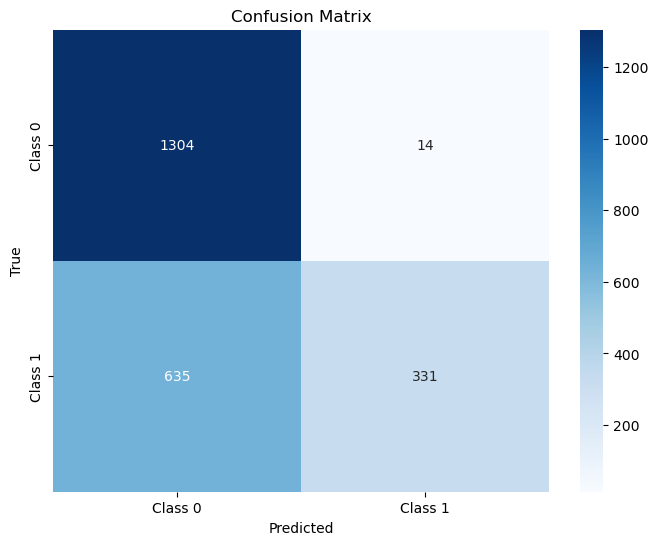

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
y_test_prob = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.8394895333603521


## Learning Curves

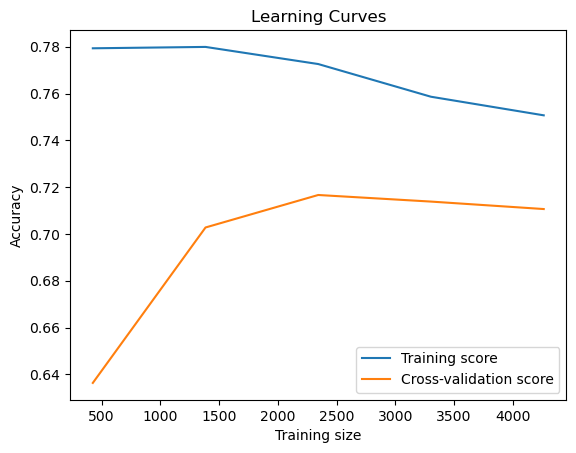

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='accuracy')

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.title('Learning Curves')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
